In [1]:
#STA 663 Final Project

#Juncheng Dong, Xiaoqiao Xing

#May 2020

import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt
from numpy import linalg as la
import random 
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

# Partial Least Square Function 

In [2]:
def Normalize(X):
    '''func to centerize and normalize the dataset,dataset should be numpy array'''
    
    return (X - np.mean(X, axis = 0))/(np.std(X, axis = 0))

In [3]:
def norm(x):
    sum=0
    for i in x:
        sum = sum + i**2
    
    return np.sqrt(sum)

In [4]:
def PLS(X,Y,ncomponents,tol=1e-6):
    E,F=X,Y
    T = []
    W = []
    Q = []
    U = []
    P = []
    B = []
    rY, cY = Y.shape
    rX, cX = X.shape
    for i in range(ncomponents):
        index=np.random.choice(range(Y.shape[1]))
        #u=Y[:,index]
        u=np.random.rand(rY)
        counter = 0
        while(True):
            w = E.T@u
            w = w/norm(w)
            t = E@w
            t = t/norm(t)
            q = F.T@t
            q = q/norm(q)
            u = F@q
            
            if counter==0:
                tlast=t
            elif norm(tlast-t)<tol:
                break
            else:
                tlast=t
            
            counter=counter+1
        
        b = t.T@u
        p = E.T@t
        
        B.append(b)
        T.append(t)
        P.append(p)
        W.append(w)
        Q.append(q)
        U.append(u)
        E = E-t.reshape(-1,1)@p.reshape(1,-1)
        F = F-b*t.reshape(-1,1)@q.reshape(1,-1)
    
        
    return (np.array(T),np.array(P),np.array(W),np.array(Q),np.array(U),np.diag(B))

# Test Function on Wine Data 

In [5]:
#Example1 Data : Wine
X1 = np.array([[7, 7, 13, 7], 
              [4, 3, 14, 7],
              [10, 5, 12, 5],
              [16, 7, 11, 3],
             [13, 3, 10, 3]])

Y1 = np.array([[14, 7, 8], 
              [10, 7, 6],
              [8, 5, 5],
              [2, 4, 7],
              [6, 2, 4]])

In [6]:
X1=Normalize(X1)
Y1=Normalize(Y1)
[T, P, W, Q, U, B] = PLS(X1,Y1,2)
P = P.T
Q = Q.T

In [7]:
P

array([[-2.09142399, -0.76525899],
       [ 0.05234806, -2.23353319],
       [ 2.18541095,  0.0316266 ],
       [ 2.2220038 ,  0.06214274]])

In [9]:
BPLS = la.pinv(P.T)@B@Q.T
BPLS

array([[-0.26620008, -0.24979645,  0.01208379],
       [ 0.0616003 ,  0.31967597,  0.7899574 ],
       [ 0.29689303,  0.36787953,  0.2568013 ],
       [ 0.30113295,  0.36986723,  0.2505817 ]])

# Compare OLS and PLS when there is only one solution

In [10]:
# OLS vs PLS
X_sim = np.random.randn(5, 5)
X_sim

array([[ 0.54866045,  0.44999304, -0.1671458 , -1.52615899,  1.64624995],
       [-1.49519606, -0.19913497,  0.61932406, -0.67909876,  0.0185365 ],
       [ 0.22316393,  0.67706721,  0.02651495,  1.16929049,  1.58098924],
       [-0.0773167 , -0.09873618,  0.63116646, -0.34468435,  0.1556186 ],
       [-0.68651197,  0.04042758, -0.17329471,  1.880685  , -0.0833826 ]])

In [11]:
Y_sim = np.random.randn(5,1)
Y_sim

array([[ 1.58777908],
       [-0.56625565],
       [ 0.75361078],
       [-2.06295635],
       [ 0.49627838]])

In [12]:
X_sim = Normalize(X_sim)
Y_sim = Normalize(Y_sim)

In [17]:
from sklearn.linear_model import LinearRegression

OLS = LinearRegression()
B_O = OLS.fit(X_sim, Y_sim).coef_.T
B_O

array([[-0.63015429],
       [ 0.28514484],
       [-0.91384279],
       [-0.28843675],
       [ 0.3701709 ]])

In [18]:
[T, P, W, Q, U, B] = PLS(X_sim,Y_sim,5)

P = P.T
Q = Q.T
B_P = la.pinv(P.T)@B@Q.T
B_P

array([[-0.63015429],
       [ 0.28514484],
       [-0.91384279],
       [-0.28843675],
       [ 0.3701709 ]])

In [19]:
np.allclose(B_O, B_P)

True

In [20]:
pls = PLSRegression(n_components=5)

pls.fit(X_sim, Y_sim).coef_

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:292: UserWarning: Y residual constant at iteration 4
  warnings.warn('Y residual constant at iteration %s' % k)


array([[-0.70453391],
       [ 0.31880162],
       [-1.0217073 ],
       [-0.32248209],
       [ 0.41386365]])

# PLS Application & Comparison

In [21]:
#Import cars data
df = pd.read_excel("/Users/rachelxing/Desktop/STA663/cars_pls_regression.xls")
df.head()

,diesel,twodoors,sportsstyle,wheelbase,length,width,height,curbweight,enginesize,horsepower,horse_per_weight,conscity,price,symboling
0,0,1,0,97.3,171.7,65.5,55.7,2209,109,85,0.038479,8.713514,7975,2
1,0,0,0,99.8,176.6,66.2,54.3,2337,109,102,0.043646,9.802703,13950,2
2,0,0,0,115.6,202.6,71.7,56.5,3740,234,155,0.041444,14.704054,34184,-1
3,0,1,1,102.9,183.5,67.7,52.0,3016,171,161,0.053382,12.382362,15998,3
4,0,0,0,101.2,176.8,64.8,54.3,2765,164,121,0.043761,11.203089,21105,0


In [22]:
X = df.iloc[:,:-3].to_numpy()
Y = df.iloc[:, -3:].to_numpy()
X.shape, Y.shape

((20, 11), (20, 3))

In [23]:
#normalize X and Y
X = Normalize(X)
Y = Normalize(Y)

In [24]:
#PLS + leave one out (20 fold)
kf = KFold(n_splits=20, random_state=None, shuffle=False)
kf.get_n_splits(X)


20

In [27]:
y_predict_pls = []
y_test_pls = []

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    [T, P, W, Q, U, B] = PLS(X_train,y_train,7)
    
    P = P.T
    Q = Q.T
    BPLS = la.pinv(P.T)@B@Q.T
    
    y_test_pls.append(y_test)
    y_predict_pls.append(X_test@BPLS)

In [28]:
y_predict_pls = np.array(y_predict_pls).reshape(20,3)
y_test_pls = np.array(y_test_pls).reshape(20,3)

In [29]:
mean_squared_error(y_test_pls, y_predict_pls)

0.3803848191192367

In [59]:
#OLS on cars data + leave one out 
y_predict_ols = []
y_test_ols = []


for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    reg1 = LinearRegression().fit(X_train, y_train[:,0])
    reg2 = LinearRegression().fit(X_train, y_train[:,1])
    reg3 = LinearRegression().fit(X_train, y_train[:,2])
    
    p1 = reg1.predict(X_test)
    p2 = reg2.predict(X_test)
    p3 = reg3.predict(X_test)
    
    y_test_ols.append(y_test)
    y_predict_ols.append([p1 ,p2, p3])




In [60]:
y_predict_ols = np.array(y_predict_ols).reshape(20,3)
y_test_ols = np.array(y_test_ols).reshape(20,3)

In [61]:
mean_squared_error(y_test_ols, y_predict_ols)

0.7889150488375855

In [33]:
#Ridge Regression

#Select best parameter alpha
ridge = Ridge()
parameters = {'alpha' : [1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_reg = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv = 20)
ridge_reg.fit(X, Y)
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)


{'alpha': 5}
-0.4260849040371636


In [34]:
#Ridge Regression

y_predict_ridge = []
y_test_ridge = []

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    reg = Ridge(alpha=5)
    reg.fit(X_train, y_train)
    
    
   
    
    y_test_ridge.append(y_test)
    y_predict_ridge.append(reg.predict(X_test))



In [35]:
y_predict_ridge = np.array(y_predict_ridge).reshape(20,3)
y_test_ridge = np.array(y_test_ridge).reshape(20,3)

In [36]:
mean_squared_error(y_test_ridge, y_predict_ridge)

0.4260849040371637

In [37]:
#Principal Component Regression 
pca = PCA(n_components=7)
pca.fit(X.T)
print(pca.explained_variance_ratio_)

[0.42125265 0.29217237 0.11760887 0.0978641  0.04417708 0.01401474
 0.00561174]


In [38]:
Z = pca.components_.T

In [39]:
X.shape, pca.components_.T.shape

((20, 11), (20, 7))

In [40]:
#Regress on Principal components

y_predict_pcr = []
y_test_pcr = []


for train_index, test_index in kf.split(Z):
    
    X_train, X_test = Z[train_index], Z[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    reg1 = LinearRegression().fit(X_train, y_train[:,0])
    reg2 = LinearRegression().fit(X_train, y_train[:,1])
    reg3 = LinearRegression().fit(X_train, y_train[:,2])
    
    p1 = reg1.predict(X_test)
    p2 = reg2.predict(X_test)
    p3 = reg3.predict(X_test)
    
    y_test_pcr.append(y_test)
    y_predict_pcr.append([p1 ,p2, p3])

    
y_predict_pcr = np.array(y_predict_pcr).reshape(20,3)
y_test_pcr = np.array(y_test_pcr).reshape(20,3)


In [41]:
mean_squared_error(y_test_pcr, y_predict_pcr)

0.529306968832853

# Visualization

In [62]:
df_test =pd.DataFrame(Y, columns=['N_conscity', 'N_price', 'N_symboling'] )

In [63]:
df_test.head()

,N_conscity,N_price,N_symboling
0,-0.477892,-0.734001,0.877058
1,-0.088928,-0.069960,0.877058
2,1.661409,2.178774,-1.754116
3,0.832302,0.157647,1.754116
4,0.411168,0.725221,-0.877058


In [64]:
df_test[['PLS_conscity', 'PLS_price', 'PLS_symboling']] = pd.DataFrame(y_predict_pls)

In [65]:
df_test.head()

,N_conscity,N_price,N_symboling,PLS_conscity,PLS_price,PLS_symboling
0,-0.477892,-0.734001,0.877058,-0.158400,-0.894711,-0.047520
1,-0.088928,-0.069960,0.877058,-0.008222,-0.136748,0.755349
2,1.661409,2.178774,-1.754116,2.049679,1.288042,-0.017508
3,0.832302,0.157647,1.754116,1.105924,0.942771,0.169602
4,0.411168,0.725221,-0.877058,0.424986,0.529146,-1.010450


Text(0, 0.5, 'Symboling (predict)')

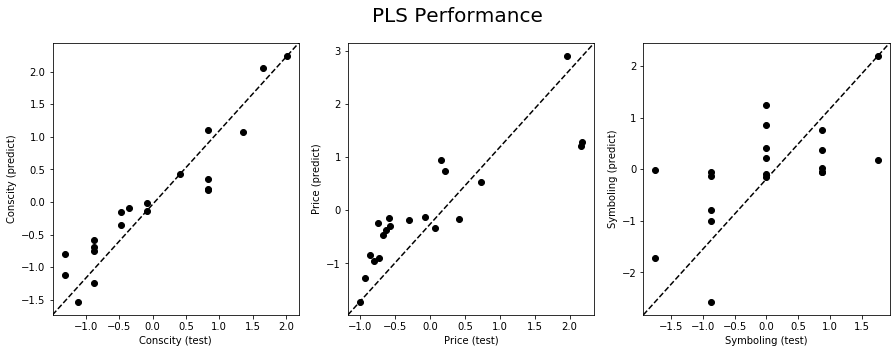

In [66]:
fig, axs = plt.subplots(1,3, figsize = (15, 5))
fig.suptitle('PLS Performance', fontsize=20)
axs[0].scatter(df_test["N_conscity"], df_test["PLS_conscity"] , c = 'black')
axs[0].plot([0, 1], [0, 1], transform=axs[0].transAxes, c = 'black', linestyle='dashed')
axs[0].set_xlabel('Conscity (test)')
axs[0].set_ylabel('Conscity (predict)')



axs[1].scatter(df_test["N_price"], df_test["PLS_price"] , c = 'black')
axs[1].plot([0, 1], [0, 1], transform=axs[1].transAxes, c = 'black', linestyle='dashed')
axs[1].set_xlabel('Price (test)')
axs[1].set_ylabel('Price (predict)')


axs[2].scatter(df_test["N_symboling"], df_test["PLS_symboling"] , c = 'black')
axs[2].plot([0, 1], [0, 1], transform=axs[2].transAxes, c = 'black', linestyle='dashed')
axs[2].set_xlabel('Symboling (test)')
axs[2].set_ylabel('Symboling (predict)')

In [67]:
df_test[['OLS_conscity', 'OLS_price', 'OLS_symboling']] = pd.DataFrame(y_predict_ols)
df_test.head()

,N_conscity,N_price,N_symboling,PLS_conscity,PLS_price,PLS_symboling,OLS_conscity,OLS_price,OLS_symboling
0,-0.477892,-0.734001,0.877058,-0.158400,-0.894711,-0.047520,-0.137693,-0.676801,-0.134618
1,-0.088928,-0.069960,0.877058,-0.008222,-0.136748,0.755349,-0.150791,-0.034786,0.821862
2,1.661409,2.178774,-1.754116,2.049679,1.288042,-0.017508,2.053453,1.967898,1.717159
3,0.832302,0.157647,1.754116,1.105924,0.942771,0.169602,0.741303,0.893708,0.076226
4,0.411168,0.725221,-0.877058,0.424986,0.529146,-1.010450,0.255424,0.728686,-1.493855


Text(0, 0.5, 'Symboling (predict)')

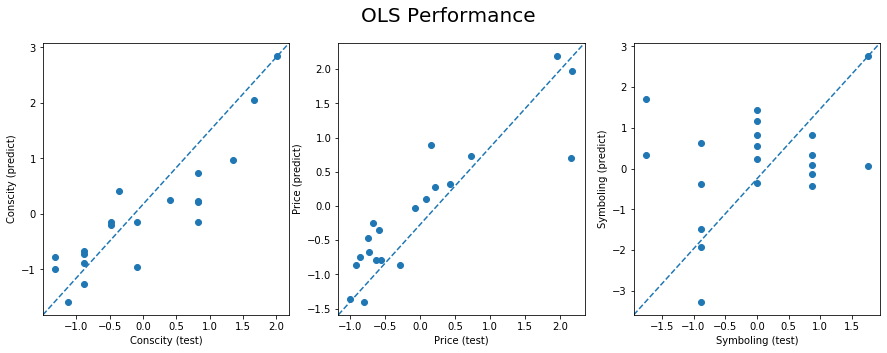

In [69]:
fig, axs = plt.subplots(1,3, figsize = (15, 5))
fig.suptitle('OLS Performance', fontsize=20)
axs[0].scatter(df_test["N_conscity"], df_test["OLS_conscity"])
axs[0].plot([0, 1], [0, 1], transform=axs[0].transAxes, linestyle='dashed')
axs[0].set_xlabel('Conscity (test)')
axs[0].set_ylabel('Conscity (predict)')


axs[1].scatter(df_test["N_price"], df_test["OLS_price"] )
axs[1].plot([0, 1], [0, 1], transform=axs[1].transAxes,  linestyle='dashed')
axs[1].set_xlabel('Price (test)')
axs[1].set_ylabel('Price (predict)')


axs[2].scatter(df_test["N_symboling"], df_test["OLS_symboling"] )
axs[2].plot([0, 1], [0, 1], transform=axs[2].transAxes,  linestyle='dashed')
axs[2].set_xlabel('Symboling (test)')
axs[2].set_ylabel('Symboling (predict)')

In [70]:
df_test[['Ridge_conscity', 'Ridge_price', 'Ridge_symboling']] = pd.DataFrame(y_predict_ridge)
df_test.head()

,N_conscity,N_price,N_symboling,PLS_conscity,PLS_price,PLS_symboling,OLS_conscity,OLS_price,OLS_symboling,Ridge_conscity,Ridge_price,Ridge_symboling
0,-0.477892,-0.734001,0.877058,-0.158400,-0.894711,-0.047520,-0.137693,-0.676801,-0.134618,-0.197439,-0.575342,0.102099
1,-0.088928,-0.069960,0.877058,-0.008222,-0.136748,0.755349,-0.150791,-0.034786,0.821862,-0.017146,-0.108850,-0.003480
2,1.661409,2.178774,-1.754116,2.049679,1.288042,-0.017508,2.053453,1.967898,1.717159,1.944111,1.296698,-0.354431
3,0.832302,0.157647,1.754116,1.105924,0.942771,0.169602,0.741303,0.893708,0.076226,1.088441,0.949889,-0.130269
4,0.411168,0.725221,-0.877058,0.424986,0.529146,-1.010450,0.255424,0.728686,-1.493855,0.319003,0.383400,-0.299150


Text(0, 0.5, 'Symboling (predict)')

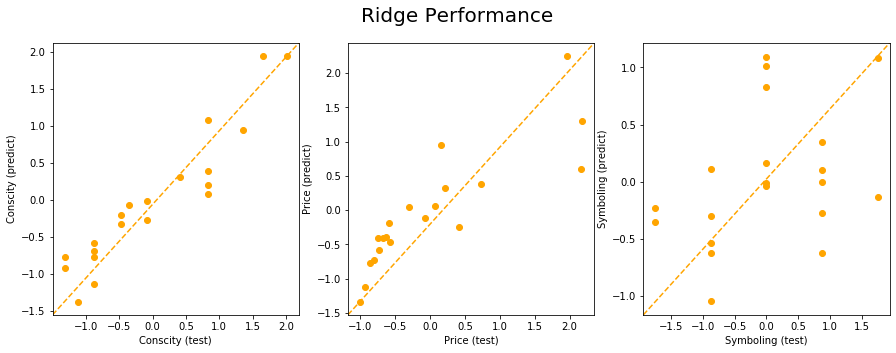

In [71]:
fig, axs = plt.subplots(1,3, figsize = (15, 5))
fig.suptitle('Ridge Performance', fontsize=20)
axs[0].scatter(df_test["N_conscity"], df_test["Ridge_conscity"], c = 'orange' )
axs[0].plot([0, 1], [0, 1], transform=axs[0].transAxes, c = 'orange', linestyle='dashed')
axs[0].set_xlabel('Conscity (test)')
axs[0].set_ylabel('Conscity (predict)')


axs[1].scatter(df_test["N_price"], df_test["Ridge_price"], c = 'orange' )
axs[1].plot([0, 1], [0, 1], transform=axs[1].transAxes, c = 'orange', linestyle='dashed')
axs[1].set_xlabel('Price (test)')
axs[1].set_ylabel('Price (predict)')


axs[2].scatter(df_test["N_symboling"], df_test["Ridge_symboling"], c = 'orange' )
axs[2].plot([0, 1], [0, 1], transform=axs[2].transAxes, c = 'orange', linestyle='dashed')
axs[2].set_xlabel('Symboling (test)')
axs[2].set_ylabel('Symboling (predict)')

In [72]:
df_test[['PCR_conscity', 'PCR_price', 'PCR_symboling']] = pd.DataFrame(y_predict_pcr)
df_test.head()

,N_conscity,N_price,N_symboling,PLS_conscity,PLS_price,PLS_symboling,OLS_conscity,OLS_price,OLS_symboling,Ridge_conscity,Ridge_price,Ridge_symboling,PCR_conscity,PCR_price,PCR_symboling
0,-0.477892,-0.734001,0.877058,-0.158400,-0.894711,-0.047520,-0.137693,-0.676801,-0.134618,-0.197439,-0.575342,0.102099,0.083218,-0.533264,-0.243432
1,-0.088928,-0.069960,0.877058,-0.008222,-0.136748,0.755349,-0.150791,-0.034786,0.821862,-0.017146,-0.108850,-0.003480,0.003676,-0.371042,0.744712
2,1.661409,2.178774,-1.754116,2.049679,1.288042,-0.017508,2.053453,1.967898,1.717159,1.944111,1.296698,-0.354431,2.189832,1.174278,0.346562
3,0.832302,0.157647,1.754116,1.105924,0.942771,0.169602,0.741303,0.893708,0.076226,1.088441,0.949889,-0.130269,0.495244,0.211356,0.261149
4,0.411168,0.725221,-0.877058,0.424986,0.529146,-1.010450,0.255424,0.728686,-1.493855,0.319003,0.383400,-0.299150,0.371493,0.391381,-1.012221


Text(0, 0.5, 'Symboling (predict)')

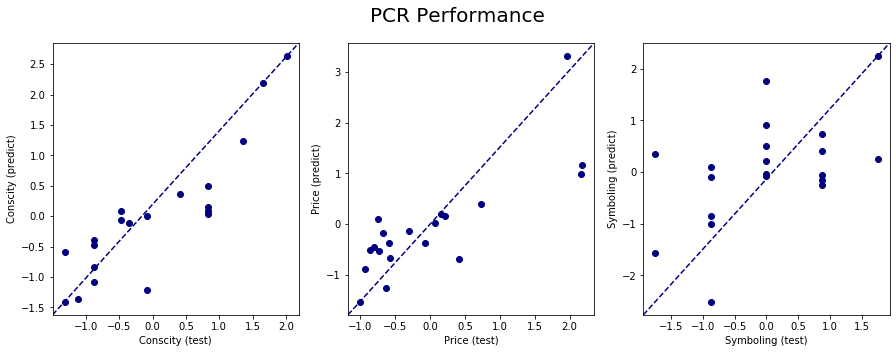

In [73]:
fig, axs = plt.subplots(1,3, figsize = (15, 5))
fig.suptitle('PCR Performance', fontsize=20)
axs[0].scatter(df_test["N_conscity"], df_test["PCR_conscity"], c = 'navy' )
axs[0].plot([0, 1], [0, 1], transform=axs[0].transAxes, c = 'navy', linestyle='dashed')
axs[0].set_xlabel('Conscity (test)')
axs[0].set_ylabel('Conscity (predict)')


axs[1].scatter(df_test["N_price"], df_test["PCR_price"], c = 'navy' )
axs[1].plot([0, 1], [0, 1], transform=axs[1].transAxes, c = 'navy', linestyle='dashed')
axs[1].set_xlabel('Price (test)')
axs[1].set_ylabel('Price (predict)')


axs[2].scatter(df_test["N_symboling"], df_test["PCR_symboling"], c = 'navy' )
axs[2].plot([0, 1], [0, 1], transform=axs[2].transAxes, c = 'navy', linestyle='dashed')
axs[2].set_xlabel('Symboling (test)')
axs[2].set_ylabel('Symboling (predict)')